# Support Vector Machines 

### Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

### Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.

Our overall goal is to use the wine dataset to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [31]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [32]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

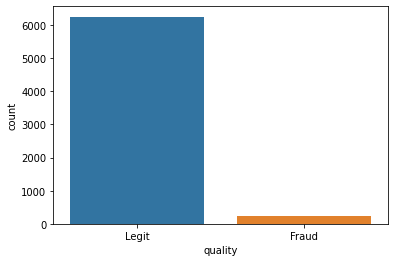

In [33]:
# countplot that displays the count per category of Legit vs Fraud.
sns.countplot(x = 'quality', data = df)

<AxesSubplot:xlabel='type', ylabel='count'>

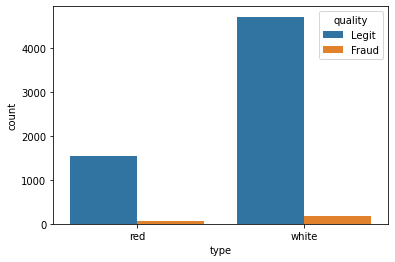

In [34]:
# difference between red and white wine when it comes to fraud.
sns.countplot(x = 'type', data = df, hue = 'quality')

In [ ]:
# percentage of red & white wines that are Fraud

In [35]:
len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')]) / len(df[df['type'] == 'red']) * 100

3.9399624765478425

In [36]:
len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')]) / len(df[df['type'] == 'white']) * 100

3.7362188648427925

In [ ]:
# correlation between the various features and the "quality" column.

In [37]:
df['Fraud'] = df['quality'].map({'Legit' : 0, 'Fraud' : 1})

In [38]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<AxesSubplot:>

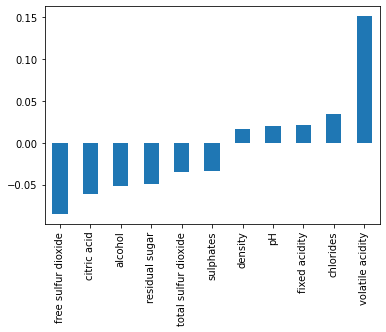

In [39]:
# bar plot of the correlation values to Fraudlent wine
df.corr()['Fraud'].drop('Fraud').sort_values().plot.bar()

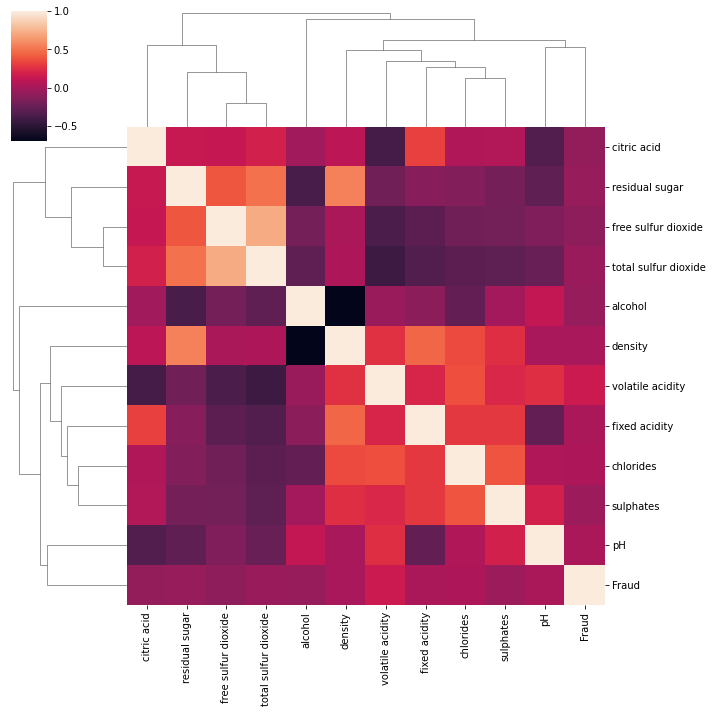

In [40]:
# clustermap with seaborn to explore the relationships between variables
sns.clustermap(df.corr())

In [ ]:
# Machine Learning Model

In [41]:
df['Red'] = df['type'].map({'red' : 1, 'white' : 0})

In [42]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud,Red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white,0,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white,0,0


In [ ]:
# Separate out the data into X features and y target label

In [43]:
X = df.drop(['quality', 'type', 'Fraud'], axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [44]:
y = df['quality']
y.head()

0    Legit
1    Legit
2    Legit
3    Legit
4    Legit
Name: quality, dtype: object

In [ ]:
# Train|Test split on the data + scaling

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
Scaled_X_train = scaler.fit_transform(X_train)

In [50]:
Scaled_X_test = scaler.transform(X_test)

In [ ]:
# Creating an instance of a Support Vector Machine classifier

In [51]:
from sklearn.svm import SVC

In [52]:
classifier = SVC(class_weight = 'balanced')

In [53]:
# param_grid = [{'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#              'Kernel' : ['linear', 'rbf', 'sigmoid', 'precomputed'],
#              'gamma' : ['scale', 'auto']},
#              {'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000],
#              'Kernel' : ['poly'],
#              'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'gamma' : ['scale', 'auto']}]

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2500, 5000, 7500, 10000],
              'gamma' : ['scale', 'auto']}

In [ ]:
# Using a GridSearchCV to run a grid search for the best C and gamma parameters

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid = GridSearchCV(classifier, param_grid, verbose = 1)

In [56]:
grid.fit(Scaled_X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:   45.3s finished


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2500, 5000,
                               7500, 10000],
                         'gamma': ['scale', 'auto']},
             verbose=1)

In [57]:
grid.best_params_

{'C': 2500, 'gamma': 'scale'}

In [ ]:
# Performance Metrics

In [58]:
y_pred = grid.predict(Scaled_X_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
confusion_matrix(y_test, y_pred)

array([[  4,  23],
       [ 16, 607]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.20      0.15      0.17        27
       Legit       0.96      0.97      0.97       623

    accuracy                           0.94       650
   macro avg       0.58      0.56      0.57       650
weighted avg       0.93      0.94      0.94       650

